<a href="https://colab.research.google.com/github/kkiprono4/Hypothyroidism-test/blob/main/Hypothyroidism_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Question
## Specifying the Question
Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.
## Understanding the context
Hypothyroidism's deficiency of thyroid hormones can disrupt such things as heart rate, body temperature and all aspects of metabolism. Hypothyroidism is most prevalent in older women. Nairobi Hospital conducted a clinical camp to test for hypothyroidism.The data collected focused on Thyroid patients.

* The Levothyroxine (T4) and Triiodothyronine (T3) hormones are produced by the thyroid gland and they play major role in converting nutrients into energy and thereby help in regulating body temperature, brain function and even the heart rate.
* The amount of T3 and T4 hormones in the blood is controlled by the Thyroid Stimulating Hormone (TSH).
* There are different thyroid function tests such as TSH, T3, T4U, Total T4 and Free T4 Index (FTI) that are done to assess the various functions related to the thyroid gland.
* A low TSH and low T4 indicate secondary hypothyroidism while a high TSH and low T4 indicate primary hypothyroidism.
* T3 tests are used for determining the severity of the hyperthyroidism or to diagnose the hyperthyroidism.
## Recording the Experimental Design
* Import the relevant libraries that we will use in our analysis
* Read and explore the dataset we will use for our project
* Find and deal with anomalies, and missing data within the dataset.
* Perform univariate, bivariate and multivariate analysis recording your observations.
* Implement the solution by building models that can predict whether a patient has hypothyroidism or not.
* For this section, we will build a model using the advanced decision trees such as Ada boost and/or the Gradient boosted trees and afterwards evaluate their performance
* Also, apply Polynomial, sigmoid and rbf kernel functions to build your SVM model and then evaluate their performance
* Give recommendations on which model is the best in predicting whether a person has hypothyroidism or not.

## Defining the metric of success
The metric of success would to be:
* To get a high percentage accuracy in the model.
* To have a clear distinction of those who had hypothyroid and those without

## Data Relevance
The data is relevant since we have all the features that will help us predict whether a patient has hyperthyrodism or not

Dataset link http://bit.ly/hypothyroid_data

#### Dataset Columns
* Age
* Sex
* on_thyroxine
* query_on_thyroxine
* on_antithyroid_medicationthyroid_surgery
* query_hypothyroid
* query_hyperthyroid
* pregnant
* sick
* tumor
* lithium
* goitre
* TSH_measured
* TSH(Thyroid Stimulating Hormone)
* T3_measured
* T3(Triiodothyronine)
* TT4_measured
* TT4(Thyroxine)

# Importing libraries

In [3]:
# Loading libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Reading the data

In [4]:
# Loading the Dataset
df = pd.read_csv('http://bit.ly/hypothyroid_data')

In [5]:
# Previewing the top of our dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [6]:
# Previewing the bottom of our dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [7]:
# Determining the no. of records in our dataset
#
df.shape

(3163, 26)

3163 records 26 variables

In [8]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

All variables are of object data type

In [9]:
#column names
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [10]:
#Summary of the data in terms of Data types , column names and Non null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

No non null values in the dataset and all varibles are in string which shouldn't be the case

# Data cleaning

In [11]:
#After exploring the data I realized that there are some "?" in some columns
#we shall replace the ? with NaN so that it can be converted to  null values
df = df.replace({'?' : np.nan})
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,NaN
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,NaN
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,NaN
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,NaN
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,NaN


In [12]:
#while checking the data, i realized that the data type for each column was  object type
#We shall convert the numerical columns to numerical data types
#numerical_columns = df['age','TSH','T3','T4U','FTI','TT4']
df["age"]=pd.to_numeric(df["age"])
df['TSH']=pd.to_numeric(df['TSH'])
df['TT4']=pd.to_numeric(df['TT4'])
df['T3']=pd.to_numeric(df['T3'])
df['FTI']=pd.to_numeric(df['FTI'])
df['T4U']=pd.to_numeric(df['T4U'])

In [13]:
#confirming changes
df.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                           object
dtype: object

In [14]:
# replacing values and variables
df = df.replace({'f' : 0, 't' : 1})
df = df.replace({'n' : 0, 'y' : 1})

In [15]:
#confirming changes
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,NaN
1,hypothyroid,15.0,F,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,NaN
2,hypothyroid,24.0,M,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,NaN
3,hypothyroid,24.0,F,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,NaN
4,hypothyroid,77.0,M,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,NaN


In [16]:
# Checking for duplicates
#
df.duplicated().sum()

77

77 duplicateas in the dataset

In [17]:
#dropping dupicates
df = df.drop_duplicates()

In [18]:
# Confirming the duplicates
#
df.duplicated().sum()

0

All the duplicates dropped

In [19]:
# Identifying the Missing Data
#
df.isnull().sum().sort_values(ascending = False)

TBG                          2835
T3                            680
TSH                           455
age                           438
TT4                           240
T4U                           239
FTI                           238
sex                            73
TSH_measured                    0
TBG_measured                    0
FTI_measured                    0
T4U_measured                    0
TT4_measured                    0
T3_measured                     0
status                          0
lithium                         0
tumor                           0
sick                            0
pregnant                        0
query_hyperthyroid              0
query_hypothyroid               0
thyroid_surgery                 0
on_antithyroid_medication       0
query_on_thyroxine              0
on_thyroxine                    0
goitre                          0
dtype: int64

Text(0.5, 1.0, 'Missing Values')

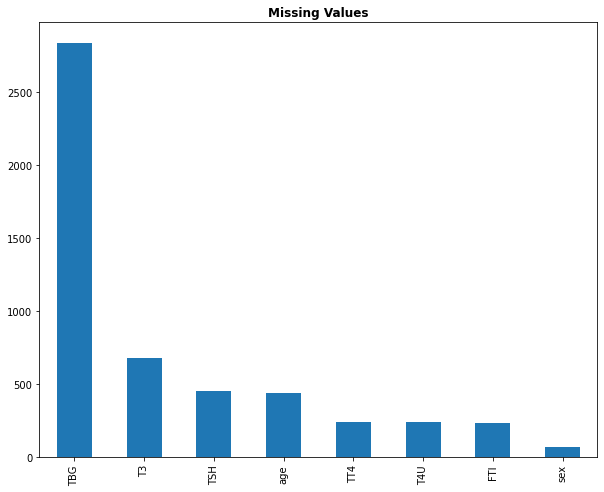

In [20]:
#Lets vizualize the missing values
plt.figure(figsize=(10,8))
df.isnull().sum().sort_values(ascending = False).head(8).plot(kind="bar")
plt.title("Missing Values",weight="bold")

TBG has the highest number of null values almost (90%) so we shall drop the column

In [21]:
#drop the 'TBG' column because it has alot of missing values(almost 90% of the data is null)
#I also dropped TBG_measured because its related to 'TBG' 
df.drop(['TBG_measured','TBG'],1, inplace=True)

In [22]:
#Dealing with null values

#We shall fill the null values with mode for categorical and median for numerical
#columns with null values = ['age', 'sex', 'TSH',"T3",'T4U', 'FTI', 'TT4']
df['age'].fillna(df['age'].median(),inplace=True)
df['sex'].fillna(df['sex'].mode()[0],inplace=True)
df['TSH'].fillna(df['TSH'].median(),inplace=True)
df["T3"].fillna(df["T3"].median(),inplace=True)
df['T4U'].fillna(df['T4U'].median(),inplace=True)
df['FTI'].fillna(df['FTI'].median(),inplace=True)
df['TT4'].fillna(df['TT4'].median(),inplace=True)

In [23]:
#confirming that there are no null values
df.isnull().sum().sum()


0

No null values

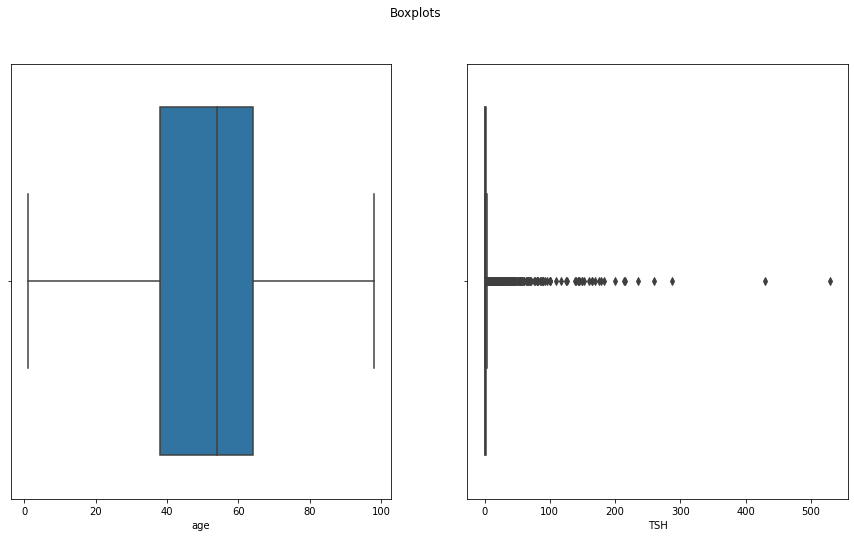

In [24]:
# Checking for outliers in the age,TSH column
fig, axes = plt.subplots(1,2, figsize=(15, 8))
fig.suptitle('Boxplots')
sns.boxplot(df['age'], ax=axes[0])
sns.boxplot(df['TSH'], ax=axes[1])
plt.show()

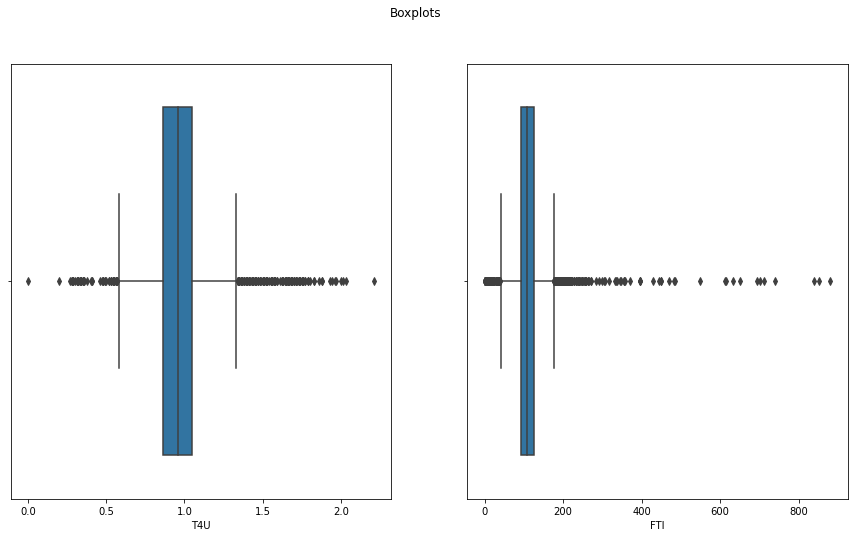

In [25]:
# Checking for outliers in the T4U,T3 column
fig, axes=plt.subplots(1,2, figsize=(15, 8))
fig.suptitle("Boxplots")
sns.boxplot(df["T4U"], ax=axes[0])
sns.boxplot(df["FTI"], ax=axes[1])
plt.show()
    

We can conclude that there are outliers in our numerical columns but it would be irresponsible to drop them because it will distort our data and tamper with our analysis and predictions.

# Univariate analysis

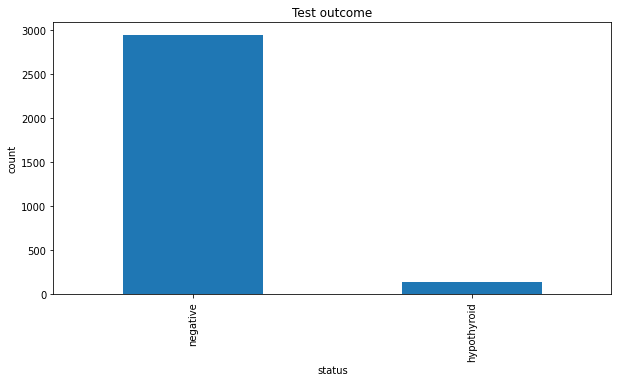

In [26]:
plt.figure(figsize = (10,5))
df['status'].value_counts().plot.bar()
plt.title('Test outcome')
plt.ylabel('count')
plt.xlabel('status')
plt.show()

Hypothyroid means one has the disease and negative means one do not have. Majority of the people tested do not have hypothyroid disorder.

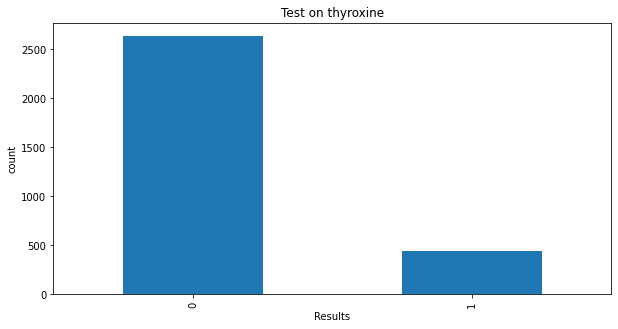

In [27]:
plt.figure(figsize = (10,5))
df['on_thyroxine'].value_counts().plot.bar()
plt.title('Test on thyroxine')
plt.ylabel('count')
plt.xlabel('Results')
plt.show()

The On- thyroxine had more false results more than true results

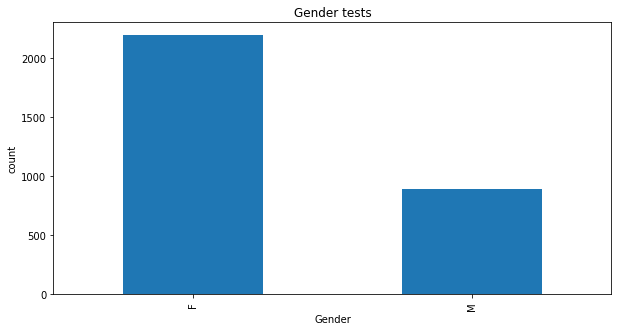

In [28]:
plt.figure(figsize = (10,5))
df['sex'].value_counts().head(20).plot.bar()
plt.title('Gender tests')
plt.ylabel('count')
plt.xlabel('Gender')
plt.show()

Most Females took the test , than males(Almost Double)

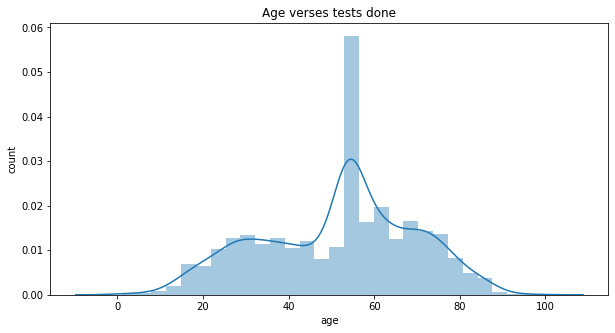

In [29]:
# Plotting a distplot to visaualize our age column
plt.figure(figsize = (10,5))
sns.distplot(df.age);
plt.title('Age verses tests done')
plt.ylabel('count')
plt.xlabel('age')
plt.show()

The laegest number of patients who tested for hypothyrodism were from the age group of 56 to 60 yrs. Elderly suffer with hypothyroid disorder. Hypothyroidism is more common among elderly individuals due to the increasing incidence and prevalence of autoimmune thyroiditis that occurs with aging.

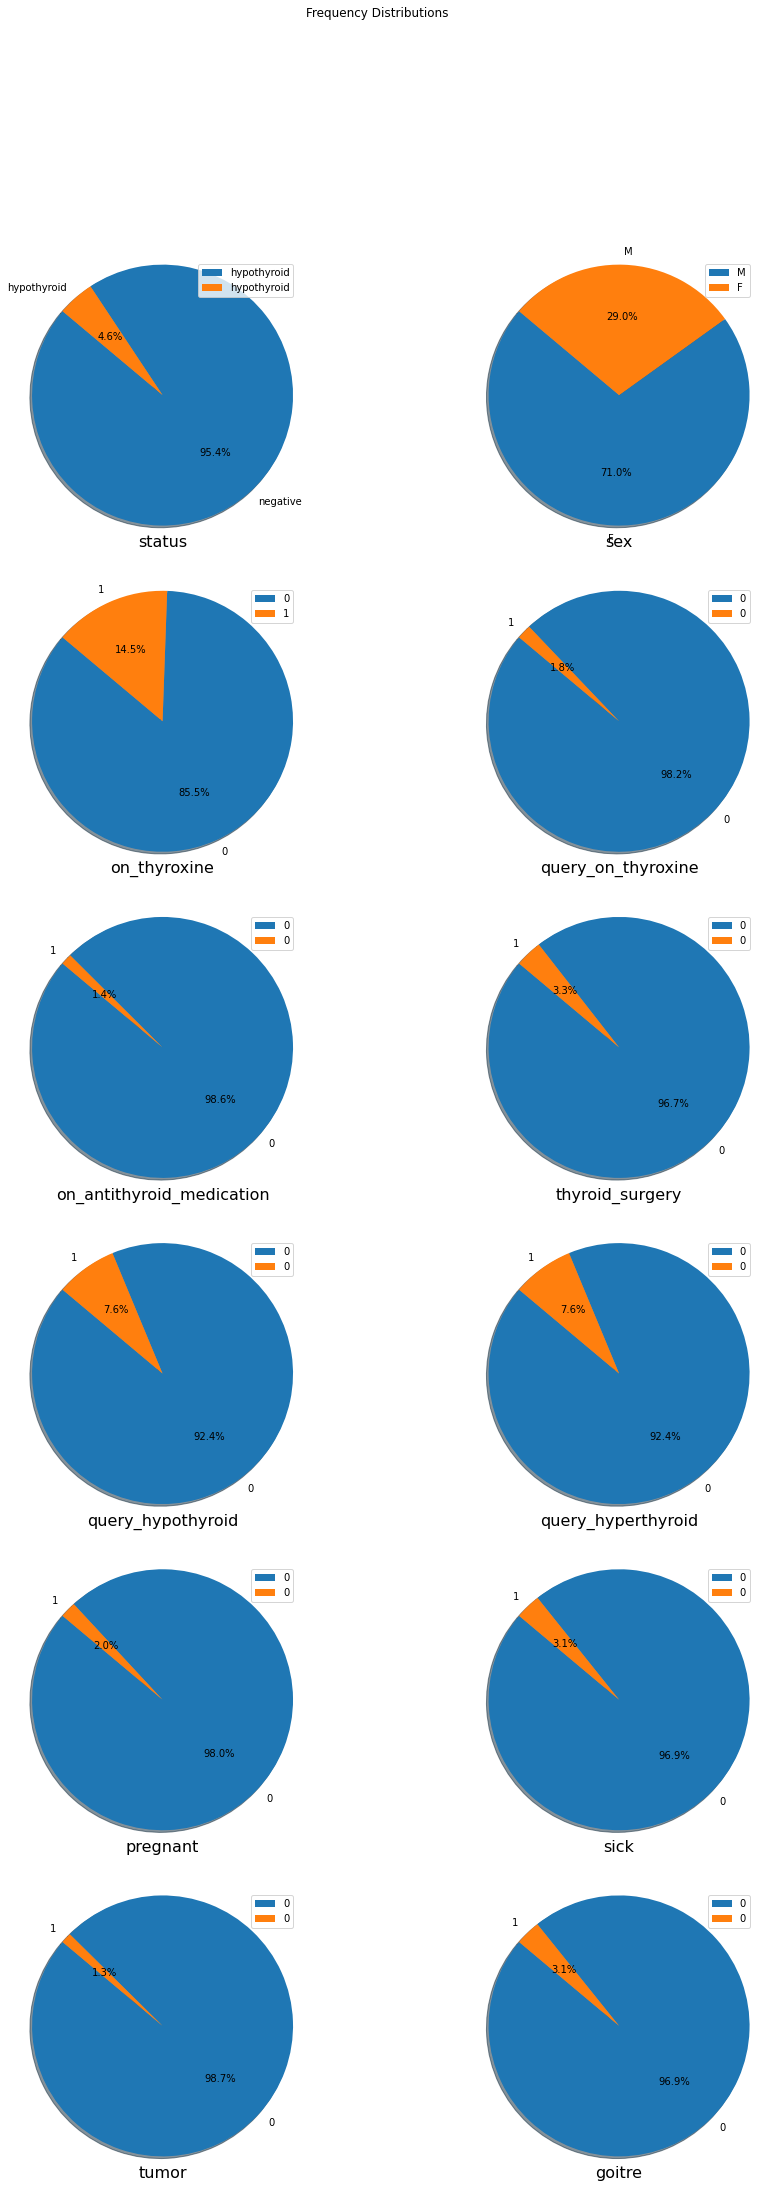

In [30]:
categorical = ['status',  'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'goitre']

#plotting our frequencies on pie charts to visualise our percentage distributions
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12)) = plt.subplots(6,2, figsize=(15, 35))
fig.suptitle('Frequency Distributions')
axes_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]


#iterating our columns as we plot
for i, col in enumerate(categorical):
    axes_list[i].pie(df[col].value_counts(), labels=df[col].value_counts().keys(), autopct='%1.1f%%',radius=1.2, shadow=True, startangle=140)
    axes_list[i].set_xlabel(col, fontsize=16)
    axes_list[i].legend(df[col], loc='best')

## Measures of Central tendency

In [31]:
# Checking the median, mode, varaince, skewness and kurtosis of our dataframe

numerical=df[['age','TSH','T3','T4U','FTI','TT4']]


for i in numerical:
  print('The median of', i, 'is:')
  print(df[i].median())
  print('The mode of', i, 'is:')
  print(df[i].mode())
  print('The variance of', i, 'is:')
  print(df[i].var())
  print('The skewness of', i, 'is:')
  print(df[i].skew())
  print('The kurtosis of', i, 'is:')
  print(df[i].kurt())
  print('                                    ')

The median of age is:
54.0
The mode of age is:
0    54.0
dtype: float64
The variance of age is:
319.7964204947089
The skewness of age is:
-0.25061597637162447
The kurtosis of age is:
-0.6166128357074219
                                    
The median of TSH is:
0.7
The mode of TSH is:
0    0.0
dtype: float64
The variance of TSH is:
495.27902899707397
The skewness of TSH is:
11.134706491016347
The kurtosis of TSH is:
179.78918894580846
                                    
The median of T3 is:
1.8
The mode of T3 is:
0    1.8
dtype: float64
The variance of T3 is:
0.7509952144415457
The skewness of T3 is:
2.5399945805304966
The kurtosis of T3 is:
15.083979228671417
                                    
The median of T4U is:
0.96
The mode of T4U is:
0    0.96
dtype: float64
The variance of T4U is:
0.04705604986602351
The skewness of T4U is:
1.009370665914294
The kurtosis of T4U is:
3.989548618420245
                                    
The median of FTI is:
107.0
The mode of FTI is:
0    107

# Bivariate Analysis

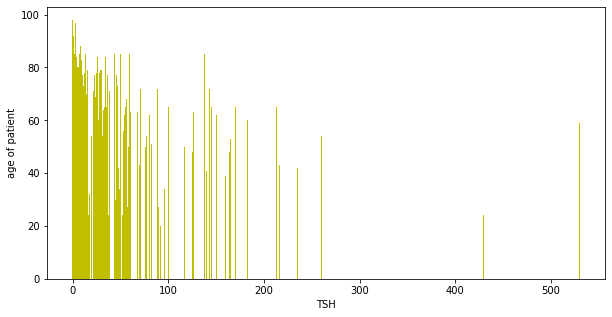

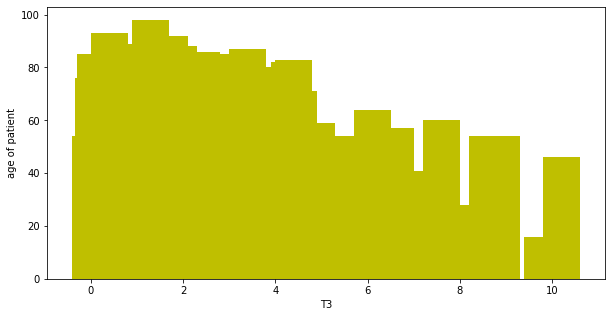

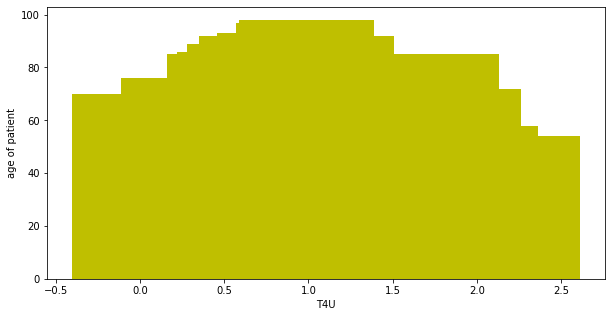

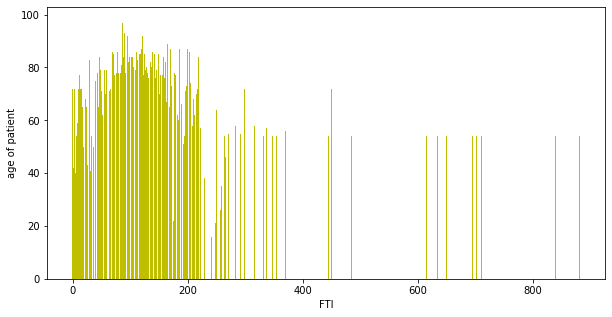

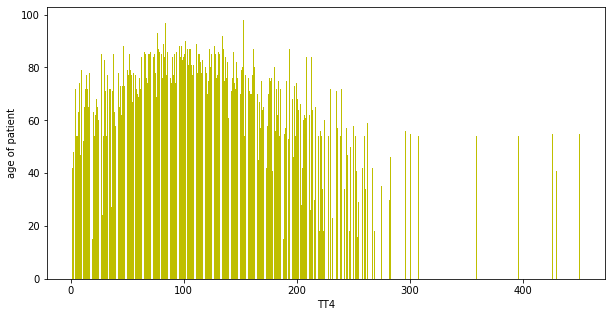

In [32]:
# We will compare age to some of our variables
numerical1=df[['TSH','T3','T4U','FTI','TT4']]

for i in numerical1:
  fig = plt.figure(figsize = (10,5))
  x = df[i]
  y = df['age']
  plt.bar(x,y, color = 'y')
  plt.xlabel(i)
  plt.ylabel('age of patient')
  plt.show()


* Most of the tests were done on the elderly above 60 years
* T3 level increases as age decreases

In [33]:
# Asses correlation between our variables 
df.corr()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
age,1.000000,-0.005101,-0.019277,-0.059429,-0.012593,0.041834,-0.089698,-0.159215,0.062148,-0.064875,-0.022108,-0.038327,0.206241,0.009038,0.181818,-0.253898,0.128196,-0.083224,0.125829,-0.192560,0.126376,0.030334
on_thyroxine,-0.005101,1.000000,-0.013574,-0.024418,0.031370,0.066144,-0.086734,0.001219,-0.063480,-0.022658,-0.010467,-0.025874,0.069553,0.000423,-0.161697,0.012892,0.057418,0.218871,0.057030,0.072426,0.060094,0.115617
query_on_thyroxine,-0.019277,-0.013574,1.000000,-0.015823,0.015876,-0.020206,-0.038674,-0.019129,-0.024267,0.049524,-0.003430,0.004078,-0.109774,-0.023564,-0.087931,-0.020724,0.039118,-0.019134,0.039030,-0.033888,0.038941,-0.003130
on_antithyroid_medication,-0.059429,-0.024418,-0.015823,1.000000,-0.006256,-0.033724,0.124440,0.003412,-0.021160,-0.013461,-0.002991,-0.021048,-0.030035,-0.003487,-0.018524,0.064307,-0.049433,-0.004198,-0.049670,0.025398,-0.049909,-0.019738
thyroid_surgery,-0.012593,0.031370,0.015876,-0.006256,1.000000,0.001065,0.021470,-0.013427,-0.033475,-0.021294,-0.004732,-0.022904,0.036567,0.015103,0.007382,-0.006525,0.006806,-0.015920,0.006594,0.026214,0.006381,-0.025835
query_hypothyroid,0.041834,0.066144,-0.020206,-0.033724,0.001065,1.000000,-0.017942,-0.014439,-0.051720,-0.032900,0.040694,-0.023296,0.050476,0.070798,-0.024222,-0.040453,0.037754,-0.009840,0.037478,0.045194,0.037202,-0.044778
query_hyperthyroid,-0.089698,-0.086734,-0.038674,0.124440,0.021470,-0.017942,1.000000,0.073329,-0.051720,-0.032900,-0.007311,0.040038,-0.135600,-0.033873,-0.036012,0.166676,-0.094539,0.128255,-0.095068,0.067951,-0.095600,0.059493
pregnant,-0.159215,0.001219,-0.019129,0.003412,-0.013427,-0.014439,0.073329,1.000000,-0.025581,0.004308,-0.003616,0.081827,0.006526,-0.011843,0.030561,0.203501,-0.002225,0.171097,-0.002402,0.323201,-0.002579,-0.005512
sick,0.062148,-0.063480,-0.024267,-0.021160,-0.033475,-0.051720,-0.051720,-0.025581,1.000000,-0.020644,-0.004588,-0.032279,0.048724,-0.002230,0.077847,-0.098079,0.031509,-0.041209,0.031351,-0.047021,0.031193,-0.022258
tumor,-0.064875,-0.022658,0.049524,-0.013461,-0.021294,-0.032900,-0.032900,0.004308,-0.020644,1.000000,-0.002918,-0.020534,-0.033149,-0.021879,-0.008198,0.025894,0.011883,-0.014351,0.011767,0.024992,0.022389,-0.026083


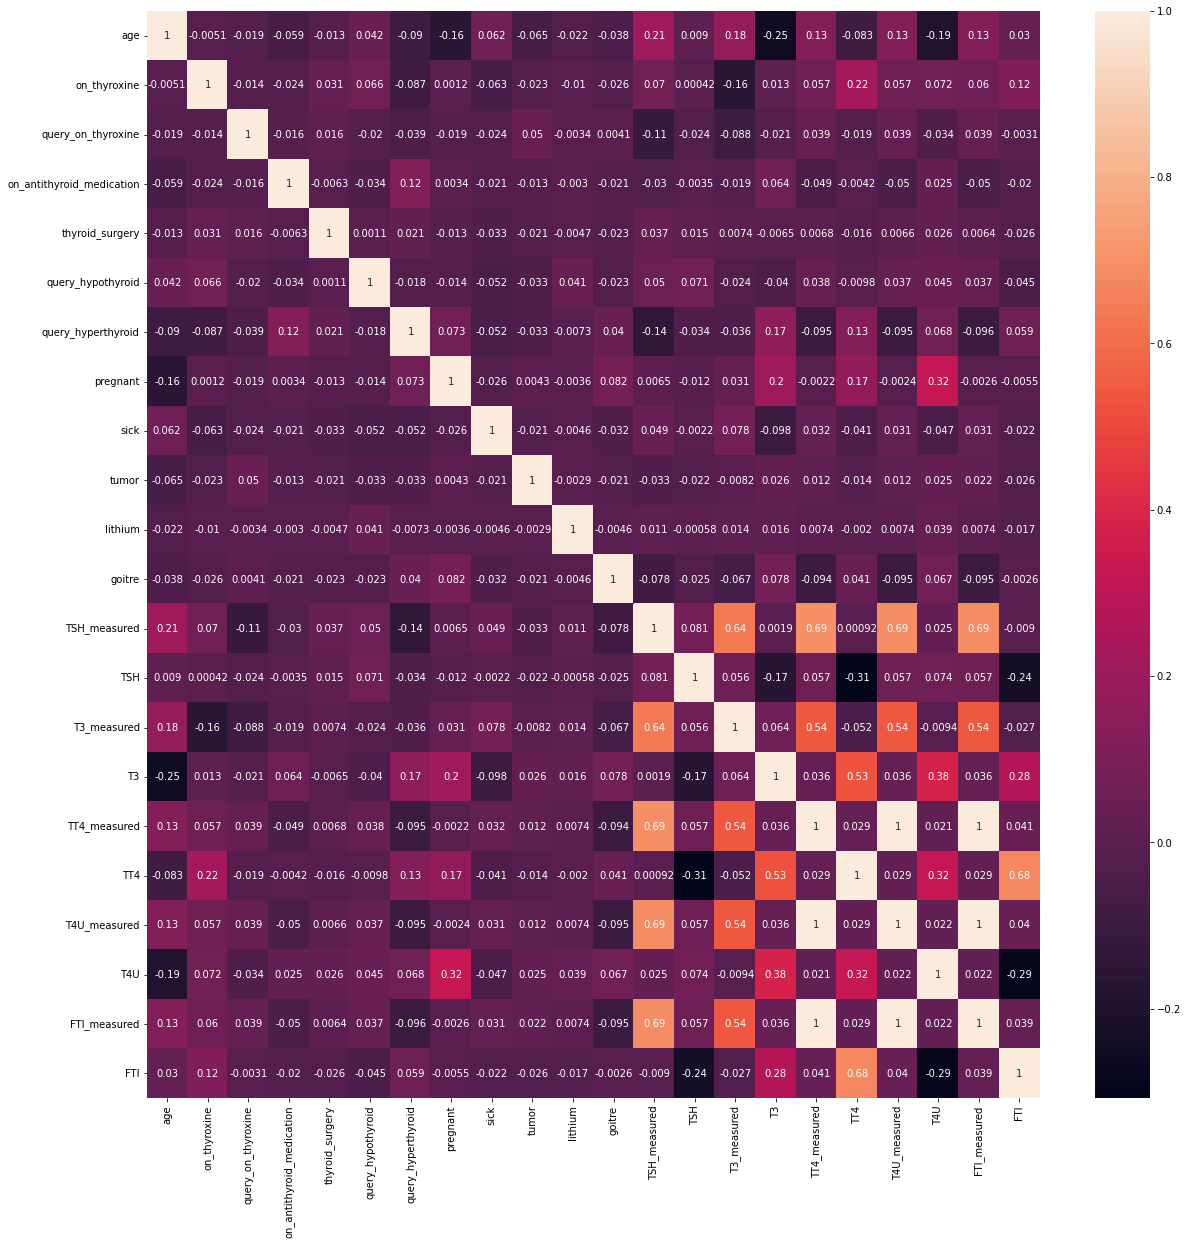

In [34]:
#correlation using heatmap
fig, heat = plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

* Coefficient of 1 accross the diagonal shows that a variable perfectly correlates to itself
* FTI_measured and TT4_measured have coefficient of 1 
* FTI_measured and T4U_measured have coefficient of 1 

# Multivariate Analysis

In [35]:
# Encode status and sex columns
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['status'] = labelencoder.fit_transform(df['status'])
df['sex'] = labelencoder.fit_transform(df['sex'])

## Linear Discriminant Analysis (LDA)

In [36]:
# We will start by separating our data into independent and dependent variables
X = df.drop('status', axis =1)
y = df['status']

In [37]:
#import Linear Discriminant Analysismethod from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [38]:
#create an instance of LDA and train the model
lda= LDA()

lda_= lda.fit(X, y)
lda_feat = lda_. transform(X)

#displaying the coefficients of the reducted columns
lda.coef_

array([[-7.86251654e-03,  1.59742784e-01, -2.38076818e-01,
         8.99437537e-01,  1.07837293e+00, -1.21187716e+00,
         9.10800287e-03, -9.52663164e-01,  1.02284751e+00,
         1.21877325e+00,  1.33077904e+00,  3.88706673e+00,
        -7.08095169e-01, -6.09540327e-01, -1.77726744e-01,
        -2.50684478e-02,  1.93185428e-01, -1.60566181e+00,
         7.10426472e-02,  2.93213473e+00, -8.10507058e+00,
        -2.01710894e+00, -1.72506006e-02]])

## Feature Importance

In [39]:
#coeeficients are in array thus we need a new dataframe to get the column names
feature_importance = pd.DataFrame(index=X.columns.values, data=lda_.coef_[0].T)
feature_importance.sort_values(0, ascending= False)

,0
lithium,3.887067
T4U_measured,2.932135
tumor,1.330779
sick,1.218773
on_antithyroid_medication,1.078373
pregnant,1.022848
query_on_thyroxine,0.899438
T3,0.193185
sex,0.159743
TT4,0.071043


# Multicollinearlity

In [40]:
# Checking for multicollinearlity using VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i)
                    for i in range(len(X.columns))]
print(vif_data)

                      feature          VIF
0                         age     9.228478
1                         sex     1.486135
2                on_thyroxine     1.382336
3          query_on_thyroxine     1.070882
4   on_antithyroid_medication     1.039568
5             thyroid_surgery     1.045602
6           query_hypothyroid     1.114547
7          query_hyperthyroid     1.175664
8                    pregnant     1.147788
9                        sick     1.060637
10                      tumor     1.055824
11                    lithium     1.005440
12                     goitre     1.062867
13               TSH_measured    17.519522
14                        TSH     1.259320
15                T3_measured     8.882610
16                         T3     9.878380
17               TT4_measured  2865.824154
18                        TT4    30.456443
19               T4U_measured  5798.240058
20                        T4U    27.128819
21               FTI_measured  2948.285380
22         

TT4_measured,TT4 ,T4U_measured,T4U ,FTI_measured,FTI,T3_measured,T3,TSH_measured and age have VIF above 5 


In [41]:
#drop the TT4_measured,TT4 ,T4U_measured,T4U ,FTI_measured,FTI columns because they have high VIF score
df.drop(['TT4_measured', 'T4U_measured', 'FTI_measured'],1, inplace=True)

In [42]:
# We will start by separating our data into independent and dependent variables
X = df.drop('status', axis =1)
y = df['status']

In [43]:
# Checking for multicollinearlity using VIF after dropping few columns 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i)
                    for i in range(len(X.columns))]
print(vif_data)

                      feature        VIF
0                         age   9.175265
1                         sex   1.454894
2                on_thyroxine   1.371080
3          query_on_thyroxine   1.037725
4   on_antithyroid_medication   1.038640
5             thyroid_surgery   1.045046
6           query_hypothyroid   1.113760
7          query_hyperthyroid   1.175027
8                    pregnant   1.142974
9                        sick   1.060600
10                      tumor   1.026151
11                    lithium   1.005380
12                     goitre   1.061391
13               TSH_measured  12.432814
14                        TSH   1.259199
15                T3_measured   8.541200
16                         T3   9.876824
17                        TT4  29.912043
18                        T4U  23.684323
19                        FTI  13.344354


TT4 ,T4U ,FTI,T3_measured,T3,TSH_measured and age have VIF above 5 

In [44]:
#drop the TT4 ,T4U ,FTI,T3_measured,T3,TSH_measured and age columns because they have high VIF score
df.drop(['TT4', 'T4U', 'FTI', 'T3_measured', 'T3', 'TSH_measured','age'],1, inplace=True)

In [45]:
# We will start by separating our data into independent and dependent variables
X = df.drop('status', axis =1)
y = df['status']

In [46]:
# Checking for multicollinearlity using VIF after dropping few columns 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i)
                    for i in range(len(X.columns))]
print(vif_data)

                      feature       VIF
0                         sex  1.068359
1                on_thyroxine  1.053104
2          query_on_thyroxine  1.020052
3   on_antithyroid_medication  1.025286
4             thyroid_surgery  1.020050
5           query_hypothyroid  1.052931
6          query_hyperthyroid  1.058231
7                    pregnant  1.024795
8                        sick  1.014906
9                       tumor  1.007579
10                    lithium  1.002214
11                     goitre  1.019496
12                        TSH  1.029858


Our VIF values are below 5 hence low multicollinearlity

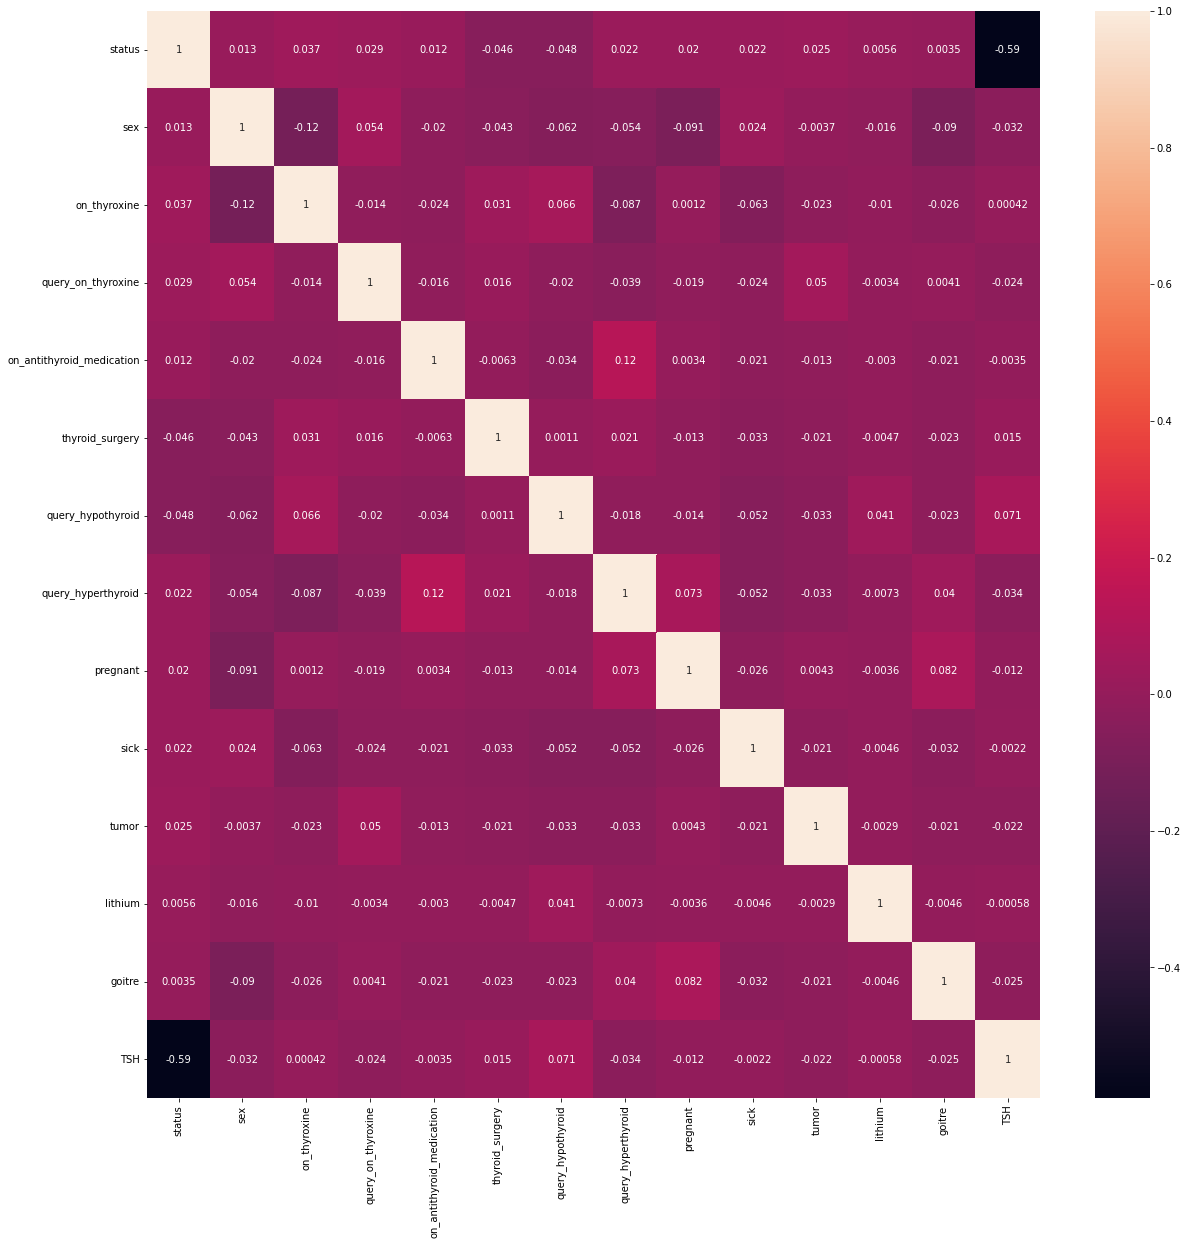

In [47]:
#correlation using heatmap after dropping columns
fig, heat = plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Part 1: Decision trees:

In [48]:
#splitting data into features and target
X=df.drop(["status"],1)
y=df[["status"]].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Building the model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
y_pred = forest.predict(X_test)
print("Confussion Matrix : \n", confusion_matrix(y_test, y_pred))
print("The accuracy of  random forest classifier is: ", accuracy_score(y_test,y_pred)*100)

Confussion Matrix : 
 [[ 16   9]
 [  9 584]]
The accuracy of  random forest classifier is:  97.0873786407767


The accuracy of the RFC is 97.087% which is not bad.

From the classification matrix 16+584 were predicted correctly and 9+9 were not predicted correctly

We shall do hyperparameter tuning so that we can fit the model with the best parameters so that we can check the accuracy

In [49]:

#choosing our best parameters using Randomised search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

search = RandomizedSearchCV(estimator= forest, param_distributions={'n_estimators': sp_randint(100,1000), 'min_samples_split': np.arange(2,20), 'max_depth': sp_randint(2,10)},
                      n_jobs=1, cv = 5)

search.fit(X_train, y_train)
search.best_params_

{'max_depth': 6, 'min_samples_split': 14, 'n_estimators': 679}

In [50]:
# fit model with the best parameters

forest = RandomForestClassifier(max_depth=8, min_samples_split=4, n_estimators=720, random_state=0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print("Confussion Matrix : \n", confusion_matrix(y_test, y_pred))
print('accuracy = ', accuracy_score(y_test, y_pred)* 100)

Confussion Matrix : 
 [[ 15  10]
 [  7 586]]
accuracy =  97.24919093851133


* The tuned model perfomed poorly compared to the baseline model with an accuracy of 97.2%
* Using confussion matrix 15 + 586 were predicted correctly and 10 + 7 were not predicted correctly

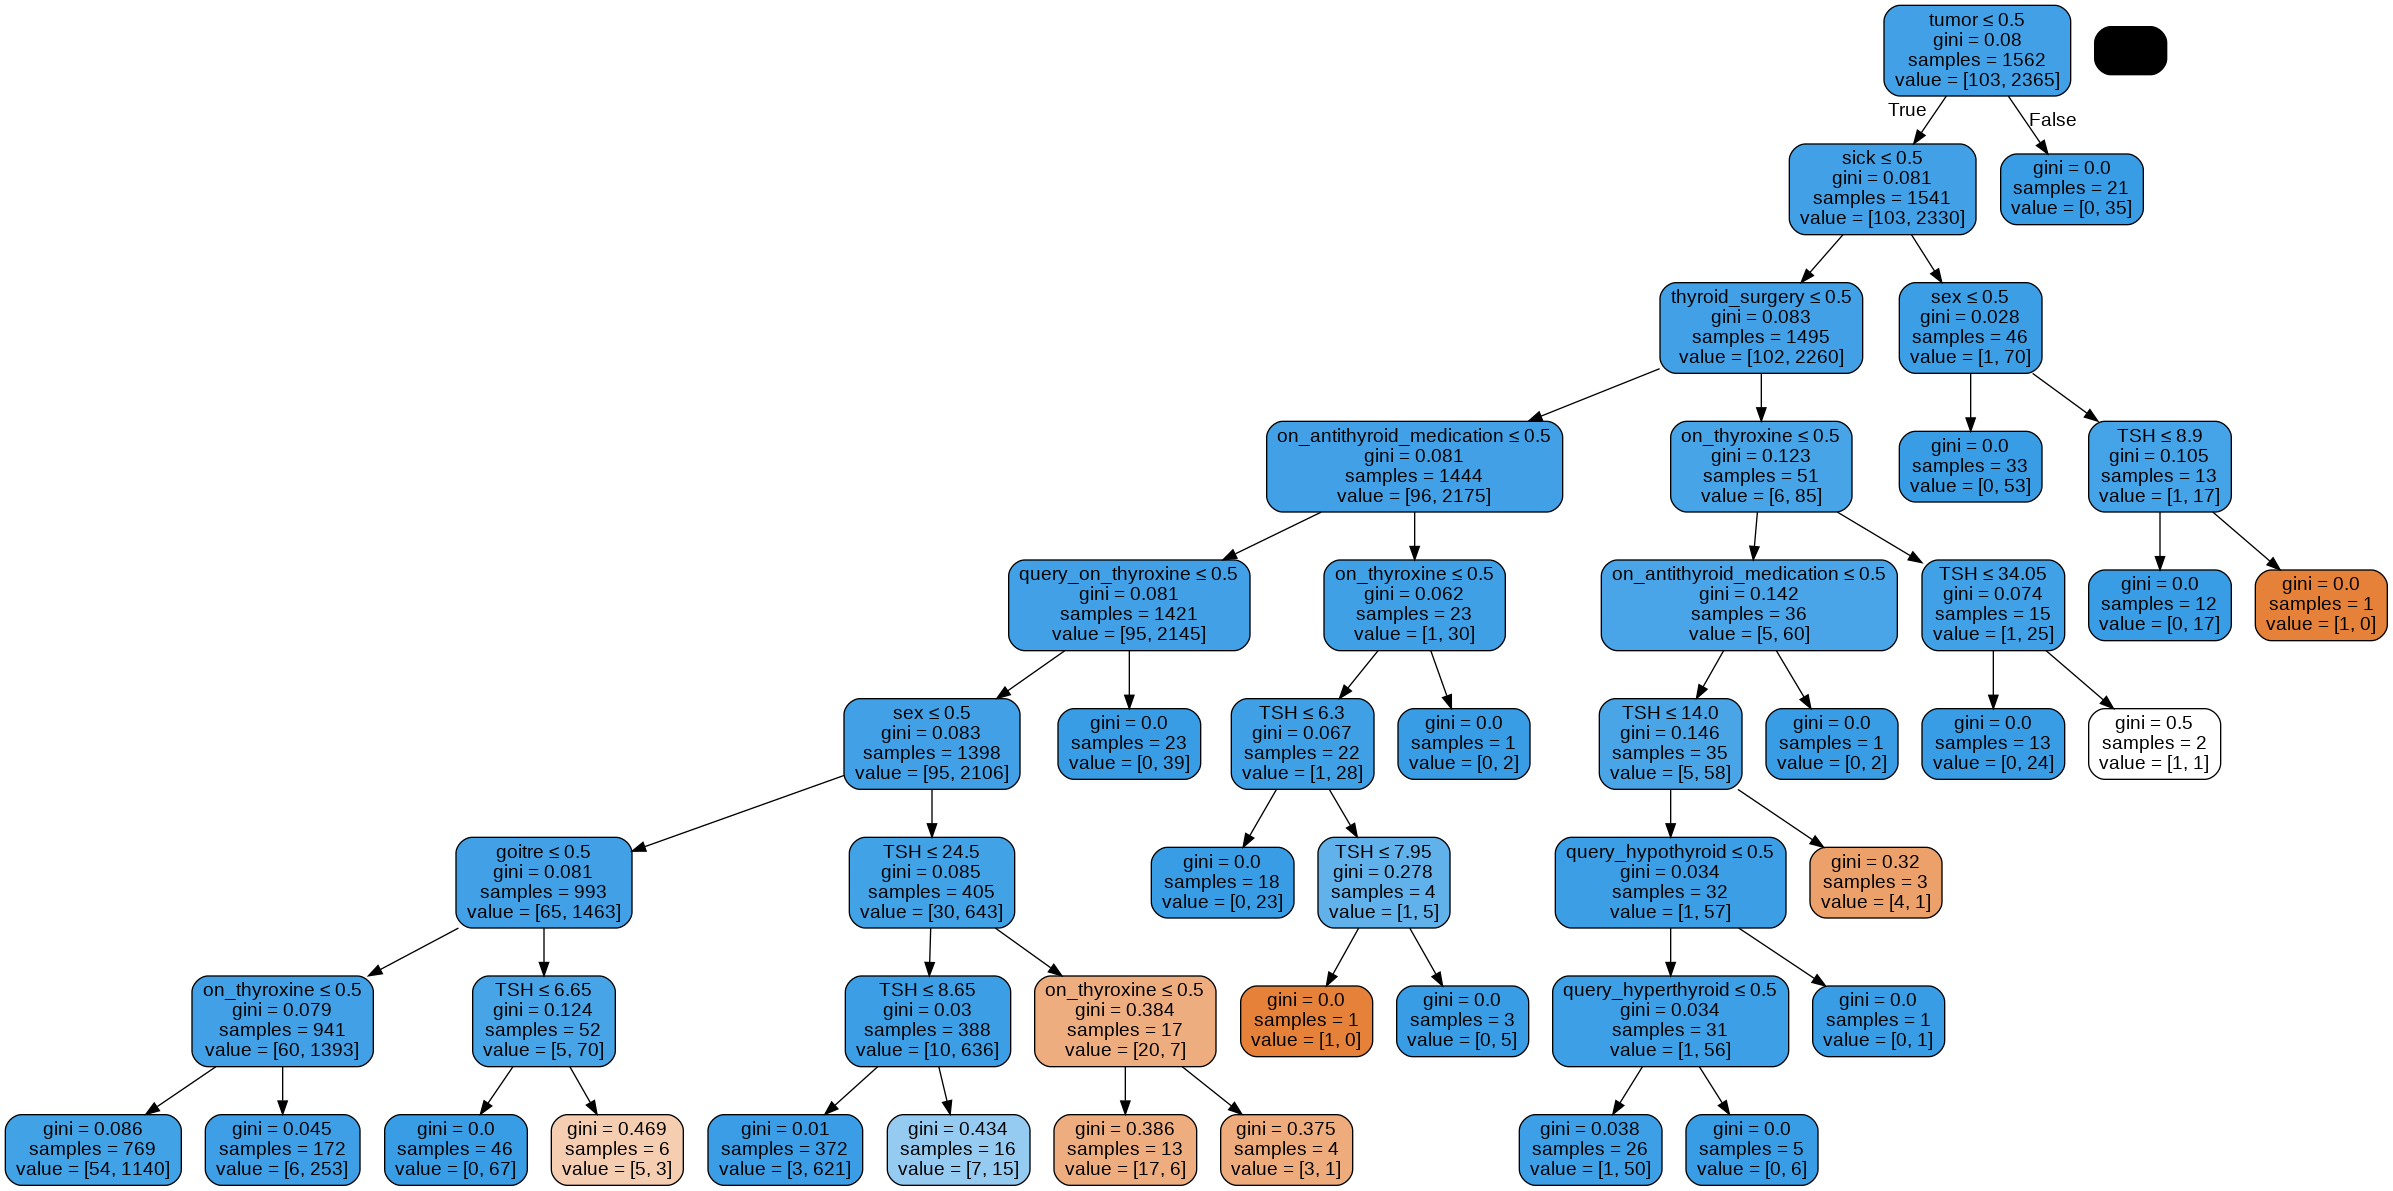

In [51]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO 
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[0]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism_forest.png')
Image(graph.create_png())


Ada boosted trees

In [52]:
from sklearn.ensemble import AdaBoostClassifier
#Building our adaboost model
ada_boost = AdaBoostClassifier()

# Train it on our training set.
ada_boost = ada_boost.fit(X_train, y_train)
#making predictions using our model
y_pred_ada = ada_boost.predict(X_test)
#checking the accuracy of our model
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_ada)*100)
print("Confusion matrix  \n" , confusion_matrix(y_test, y_pred_ada))

Accuracy: 97.24919093851133
Confusion matrix  
 [[ 17   8]
 [  9 584]]


The accuracy of the model is 97.249%

From the confusion matrix, we can see that (17+584) were predicted correcly and (8+9) were not predicted correctly

In [53]:
from sklearn.model_selection import GridSearchCV
#Creating a grid of hyperparameters
grid_params = {'n_estimators': [100,200,300]}
#Building a 3 fold CV GridSearchCV object
grid_object = GridSearchCV(estimator = ada_boost, param_grid = grid_params, scoring = 'accuracy', cv = 5, n_jobs = 1)
#Fitting the grid to the training data
grid_object.fit(X_train, y_train)
#Extracting the best parameters
print(grid_object.best_params_)

{'n_estimators': 300}


In [54]:
# identify the important featues
feature_imp = pd.Series(ada_boost.feature_importances_,\
                        index=X.columns).sort_values(ascending=False)
print('important features \n',feature_imp)

important features 
 TSH                          0.78
on_thyroxine                 0.04
thyroid_surgery              0.04
sex                          0.02
query_on_thyroxine           0.02
query_hypothyroid            0.02
query_hyperthyroid           0.02
pregnant                     0.02
sick                         0.02
goitre                       0.02
on_antithyroid_medication    0.00
tumor                        0.00
lithium                      0.00
dtype: float64


In [55]:
#run ada boost  model with important features

X1 = df[['goitre','sick','TSH','pregnant','query_hyperthyroid','on_thyroxine','query_hypothyroid','query_on_thyroxine','sex',"thyroid_surgery"]]
y1 = df['status']

#set train,test sets
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1, train_size=0.8,random_state=0)


#Building our adaboost model
ada_boost = AdaBoostClassifier(n_estimators = 300)

# Train it on our training set.
ada_boost = ada_boost.fit(X1_train, y1_train)
#making predictions using our model
y_pred_ada1 = ada_boost.predict(X1_test)
#checking the accuracy of our model
print("Accuracy:",metrics.accuracy_score(y1_test,y_pred_ada1)*100)
print("Confusion matrix  \n" , confusion_matrix(y1_test, y_pred_ada1))

Accuracy: 97.24919093851133
Confusion matrix  
 [[ 15  10]
 [  7 586]]


The accuracy of the model is 97.249%

From the confusion matrix, we can see that (15+586) were predicted correcly and (10+7) were not predicted correctly

The accuracy didn't change from the baseline model even after tunning

In [56]:
#run ada boost  model with important features

X2 = df['TSH'].values.reshape(-1, 1)
y2 = df['status'].values

#set train,test sets
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2, train_size=0.8,random_state=0)


#Building our adaboost model
ada_boost = AdaBoostClassifier(n_estimators = 300)

# Train it on our training set.
ada_boost = ada_boost.fit(X2_train,y2_train)
#making predictions using our model
y_pred_ada2 = ada_boost.predict(X2_test)
#checking the accuracy of our model
print("Accuracy:",metrics.accuracy_score(y2_test,y_pred_ada2)*100)
print("Confusion matrix  \n" , confusion_matrix(y2_test, y_pred_ada2))

Accuracy: 97.24919093851133
Confusion matrix  
 [[ 15  10]
 [  7 586]]


The accuacy(97.249%) is retained even after using the best feature (TSH)

# Gradient boosted trees

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

#gradient boosting
model = GradientBoostingClassifier()
#training our model
model = model.fit(X_train, y_train)
#making preductions
y_pred_gbr = model.predict(X_test)

#The accuracy of the model
print('GB Accuracy is  ', metrics.accuracy_score(y_test,y_pred_gbr)*100)
print("Confusion matrix  \n" , confusion_matrix(y_test, y_pred_gbr))

GB Accuracy is   98.05825242718447
Confusion matrix  
 [[ 19   6]
 [  6 587]]


Gradient boosting model has a higher accuracy compared to the ada boosted model with an accuracy of 98.058%

In [58]:
#Hyperparameter tuning
model = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [59]:
from sklearn.model_selection import GridSearchCV

## Run the grid search to get the best parameters
cv = GridSearchCV(model,parameters,cv=5)
cv.fit(X_train, y_train)

#Get the best parameters
print(cv.best_params_)

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}


In [60]:
from sklearn.ensemble import GradientBoostingClassifier

#gradient boosting
model1 = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 1, n_estimators = 250)
#training our model
model1 = model1.fit(X_train, y_train)
#making preductions
y_pred_gbr1 = model1.predict(X_test)

#The accuracy of the model
print('GB Accuracy is  ', metrics.accuracy_score(y_test,y_pred_gbr1)*100)
print("Confusion matrix  \n" , confusion_matrix(y_test, y_pred_gbr1))

GB Accuracy is   97.57281553398059
Confusion matrix  
 [[ 17   8]
 [  7 586]]


The accuracy(97.57) dropped after tuning the model compared to the baseline model

# Support Vector Machines(SMV)

## Polynomial SVM

In [61]:
#splitting data into features and target
X2 = df['TSH'].values.reshape(-1, 1)
y2 = df['status'].values

#splittig the data into train and test set
X2_test,X2_train,y2_test,y2_train=train_test_split(X2,y2,test_size=0.2,random_state=0)

In [62]:
from sklearn.svm import SVC
# Building a polynomial model 
polyclassifier = SVC(kernel='poly')
# Training the model using the training set
polyclassifier.fit(X2_train, y2_train)

#Making predictions
y_pred2=polyclassifier.predict(X2_test)


In [63]:
#model evalutaion
print("Accuracy is, ", accuracy_score(y2_test, y_pred2)*100)

Accuracy is,  96.27228525121556


## Radial basis function (rbf)model

In [66]:
# Building a polynomial model 
model_rbf= SVC(kernel='rbf')
# Training the model using the training set
model_rbf.fit(X2_train, y2_train)

#Making predictions
y_pred3=model_rbf.predict(X2_test)

In [68]:
# Model Evaluation
print("Accuracy is, ", accuracy_score(y2_test, y_pred3)*100)


Accuracy is,  97.16369529983793


## Sigmoid model

In [69]:
# Building a sigmoid model 
model_sig= SVC(kernel='sigmoid')
# Training the model using the training set
model_sig.fit(X2_train, y2_train)

#Making predictions
y_pred4=model_sig.predict(X2_test)

In [70]:
# Model Evaluation
print("Accuracy is, ", accuracy_score(y2_test, y_pred4)*100)


Accuracy is,  95.2998379254457


The best performing model is rbf with 97% compared to polynomial and sigmoid

### RBF using other features 

In [72]:
#splitting data into feature and target
X1 = df[['goitre','sick','TSH','pregnant','query_hyperthyroid','on_thyroxine','query_hypothyroid','query_on_thyroxine','sex',"thyroid_surgery"]]
y1 = df['status']

#set train,test sets
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1, train_size=0.8,random_state=0)


In [73]:
# Building a polynomial model 
model_rbf= SVC(kernel='rbf')
# Training the model using the training set
model_rbf.fit(X1_train, y1_train)

#Making predictions
y_pred=model_rbf.predict(X1_test)

In [74]:
# Model Evaluation
print("Accuracy is, ", accuracy_score(y1_test, y_pred)*100)


Accuracy is,  97.57281553398059


RBF performed better with multiple feature with an accuracy of 97.57%

# Conclusion

The accuracies of the different models were more than 90% which meant that our models were accurate.